In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#reading dataset
df=pd.read_csv('../Data/Data_COPD.csv')
print(df)

     Age  Gender Smoking_Status  Biomass_Fuel_Exposure  Occupational_Exposure  \
0     31    Male         Former                      1                      1   
1     60    Male          Never                      1                      0   
2     33    Male         Former                      0                      0   
3     36  Female        Current                      1                      0   
4     58    Male          Never                      0                      0   
..   ...     ...            ...                    ...                    ...   
995   62    Male        Current                      1                      1   
996   52    Male          Never                      0                      1   
997   40  Female        Current                      0                      0   
998   76  Female         Former                      0                      1   
999   44  Female         Former                      0                      0   

     Family_History_COPD   

In [6]:
print(df.dtypes)

Age                                   int64
Gender                               object
Smoking_Status                       object
Biomass_Fuel_Exposure                 int64
Occupational_Exposure                 int64
Family_History_COPD                   int64
BMI                                 float64
Location                             object
Air_Pollution_Level                   int64
Respiratory_Infections_Childhood      int64
COPD_Diagnosis                        int64
dtype: object


### univarient Analysis 

In [20]:
data_cols=df.select_dtypes(include=['float64','int64']).columns
print(data_cols)

Index(['Age', 'Biomass_Fuel_Exposure', 'Occupational_Exposure',
       'Family_History_COPD', 'BMI', 'Air_Pollution_Level',
       'Respiratory_Infections_Childhood', 'COPD_Diagnosis'],
      dtype='object')


<Axes: xlabel='Age', ylabel='Count'>

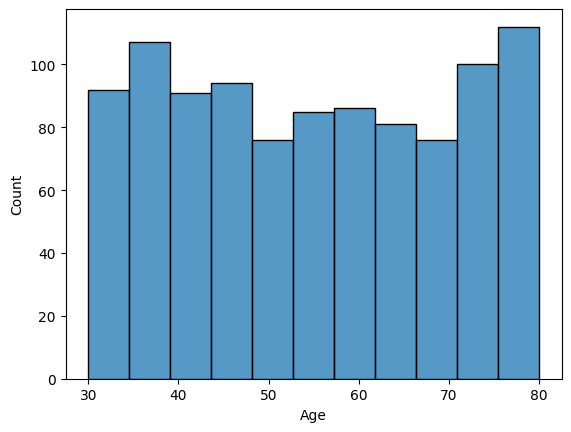

In [10]:
sns.histplot(data=df['Age'])

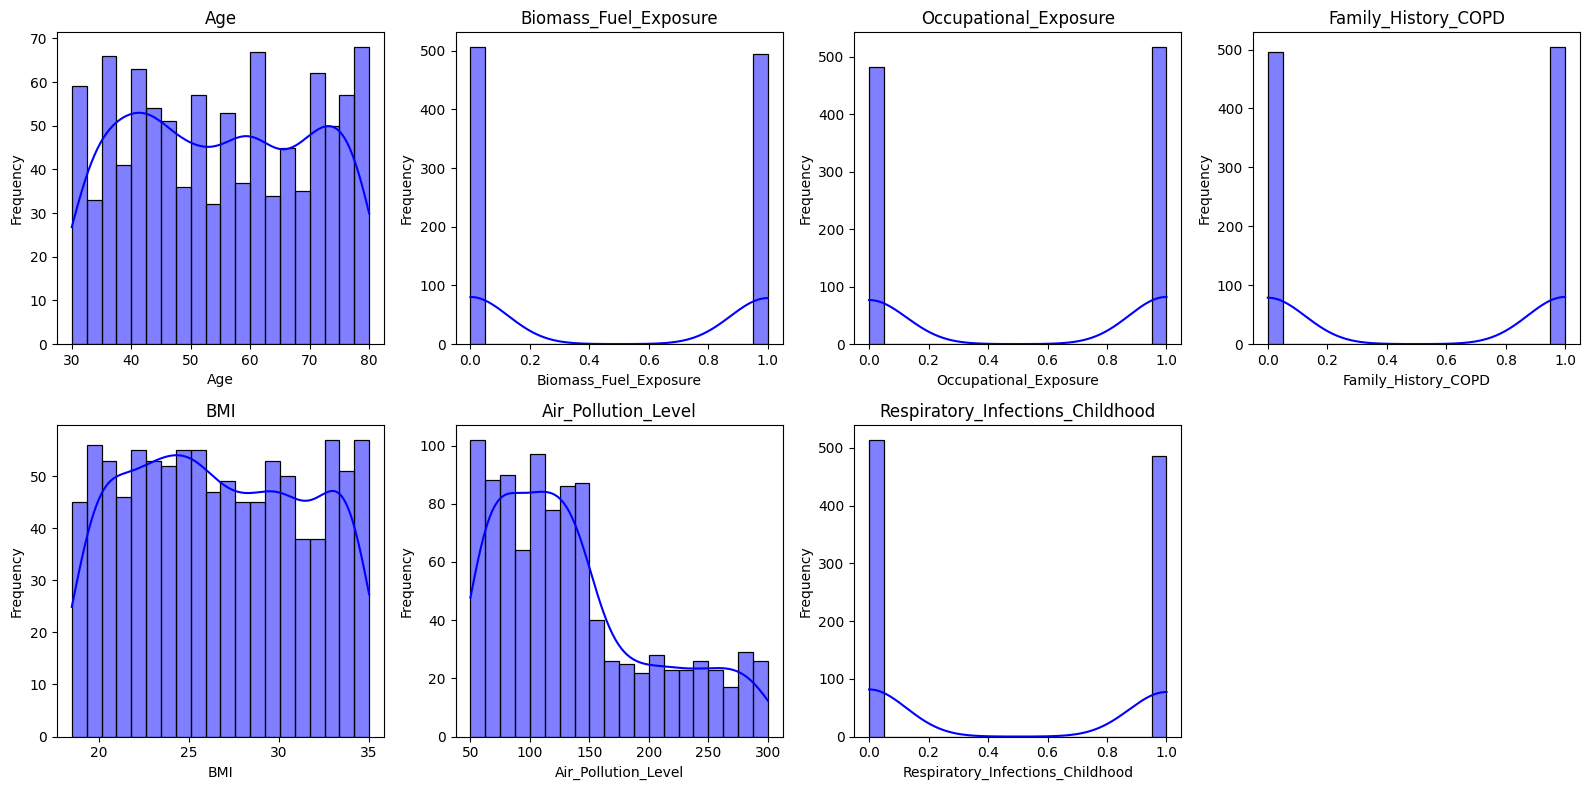

In [24]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Plot each numerical column using seaborn's histplot
for i, column in enumerate(data_cols):
    sns.histplot(df[column], bins=20, kde=True, ax=axes[i], color='blue')
    axes[i].set_title(column)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
# Remove the last empty subplot (8th position)
fig.delaxes(axes[-1])
# Adjust the layout for better spacing
plt.tight_layout()
plt.show()

## Univariate analysis for the categorical features

In [25]:
#sepearting categorical data
data_cat=df.select_dtypes(include=['bool','object']).columns
print(data_cat)

Index(['Gender', 'Smoking_Status', 'Location'], dtype='object')


Text(0.5, 1.0, 'Gender Distribution')

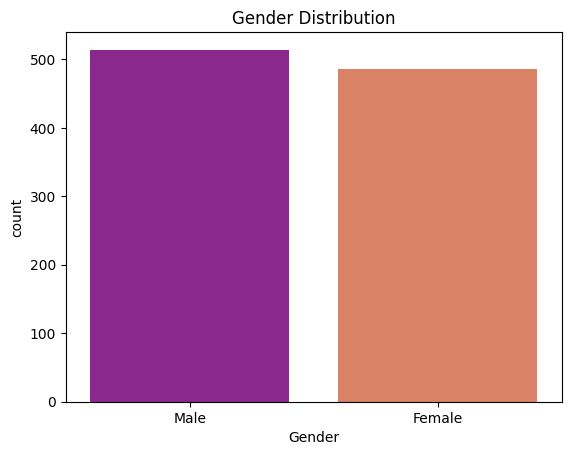

In [31]:
sns.countplot(x = 'Gender', data = df,hue='Gender',palette='plasma')
plt.title("Gender Distribution")

Text(0.5, 1.0, 'Smoking_Status')

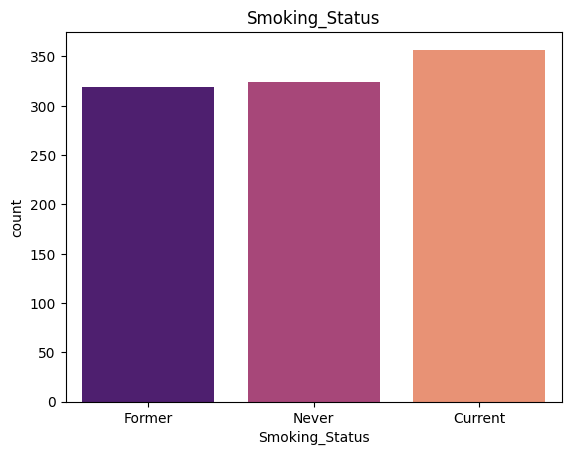

In [33]:
sns.countplot(x = 'Smoking_Status', data = df,hue='Smoking_Status',palette='magma')
plt.title("Smoking_Status")

Text(0.5, 1.0, 'Smoking_Status VS Gender')

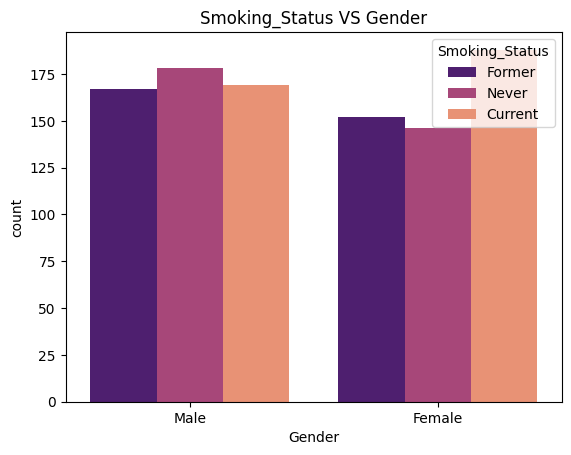

In [34]:
sns.countplot(x = 'Gender', data = df,hue='Smoking_Status',palette='magma')
plt.title("Smoking_Status VS Gender")

## Bivariate Analysis

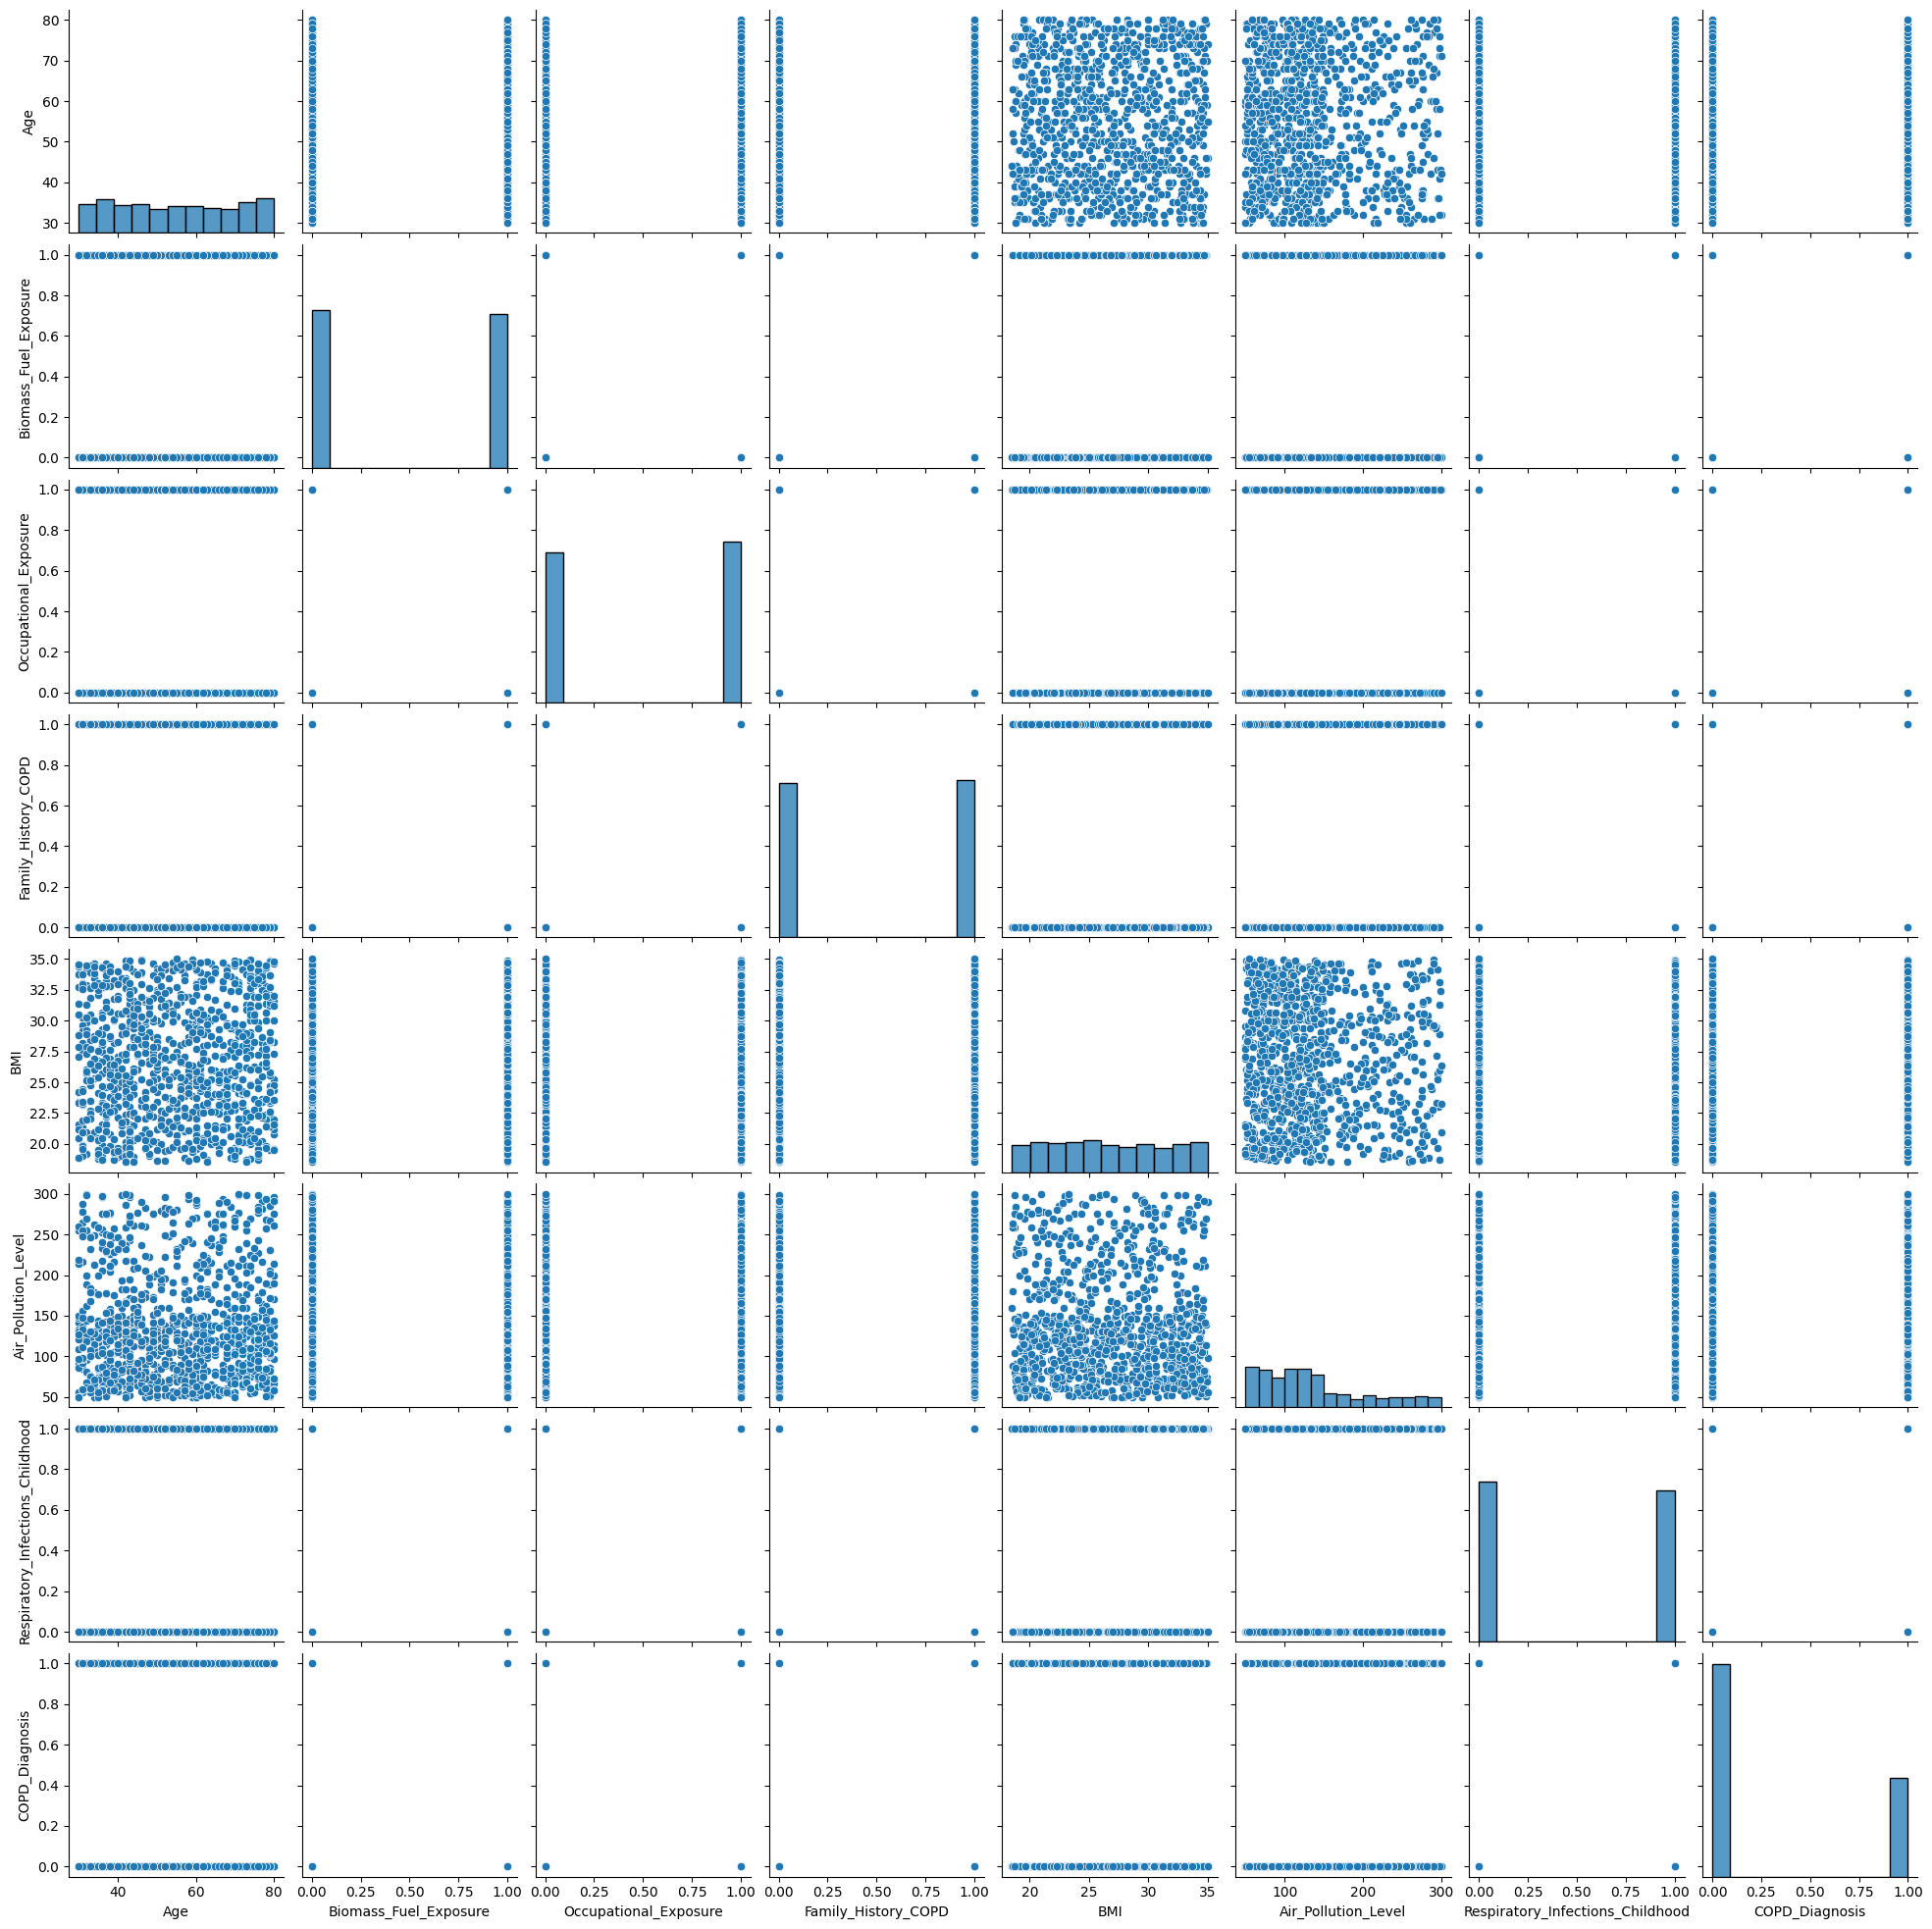

In [35]:
sns.pairplot(df)

In [36]:
#printing correlation
print(data_cols)

Index(['Age', 'Biomass_Fuel_Exposure', 'Occupational_Exposure',
       'Family_History_COPD', 'BMI', 'Air_Pollution_Level',
       'Respiratory_Infections_Childhood', 'COPD_Diagnosis'],
      dtype='object')


In [37]:
corr_matrix = df[data_cols].corr()
print(corr_matrix)

                                       Age  Biomass_Fuel_Exposure  \
Age                               1.000000               0.004228   
Biomass_Fuel_Exposure             0.004228               1.000000   
Occupational_Exposure             0.049101              -0.029611   
Family_History_COPD              -0.010621              -0.003904   
BMI                               0.010439              -0.004957   
Air_Pollution_Level              -0.011013              -0.010797   
Respiratory_Infections_Childhood  0.024812              -0.012342   
COPD_Diagnosis                   -0.027009               0.281133   

                                  Occupational_Exposure  Family_History_COPD  \
Age                                            0.049101            -0.010621   
Biomass_Fuel_Exposure                         -0.029611            -0.003904   
Occupational_Exposure                          1.000000             0.005731   
Family_History_COPD                            0.005731   

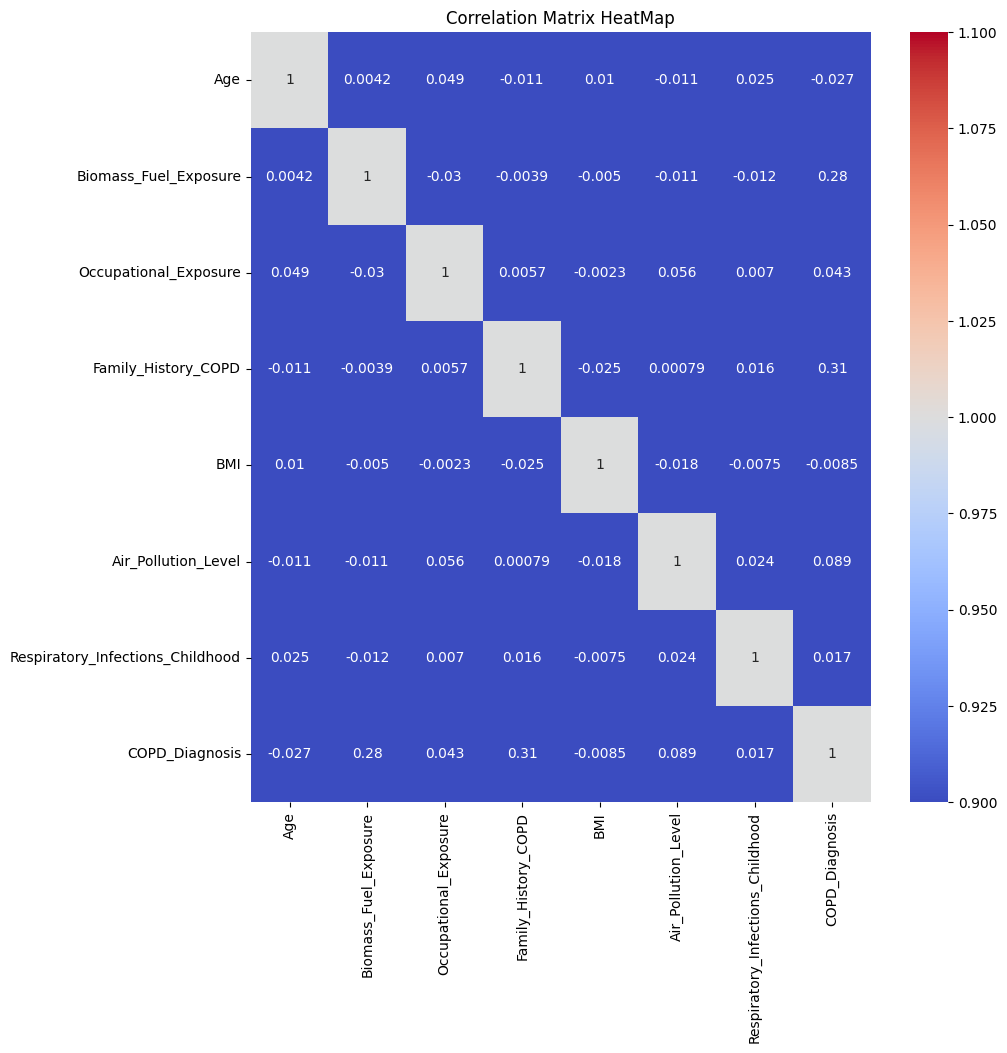

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',vmin=1,vmax=1)
plt.title("Correlation Matrix HeatMap")
plt.show()